In [68]:
import pandas as pd
import numpy as np
data=pd.read_csv('5g_slice_traffic.csv',delimiter=',')
data.head()

,Hour_of_Day,Active_Users,Latency_ms,Packet_Loss_Rate,Bandwidth_MHz,Throughput_Demand_Mbps
0,6,34,11.000130,0.015462,100,484.075785
1,19,210,29.051955,0.049394,40,631.142509
2,14,120,22.572065,0.120936,20,254.717816
3,10,9,8.356005,0.089492,20,11.961194
4,7,15,9.661152,0.055485,100,468.832644


In [69]:
# Calculamos el componente X (Seno)
data['hour_sin'] = np.sin(2 * np.pi * data['Hour_of_Day'] / 24.0)
# Calculamos el componente Y (Coseno)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour_of_Day'] / 24.0)
#Validation
is_correct = np.allclose(data['hour_sin']**2 + data['hour_cos']**2, 1.0)
print(f"¿Normalización válida?: {is_correct}")
data.drop(columns='Hour_of_Day', inplace=True)
#Moviendo a la primera y segunda posicion respectivamente
data.insert(0,'hour_sin',data.pop('hour_sin'))
data.insert(1,'hour_cos',data.pop('hour_cos'))
data.head()

¿Normalización válida?: True


,hour_sin,hour_cos,Active_Users,Latency_ms,Packet_Loss_Rate,Bandwidth_MHz,Throughput_Demand_Mbps
0,1.000000,6.123234e-17,34,11.000130,0.015462,100,484.075785
1,-0.965926,2.588190e-01,210,29.051955,0.049394,40,631.142509
2,-0.500000,-8.660254e-01,120,22.572065,0.120936,20,254.717816
3,0.500000,-8.660254e-01,9,8.356005,0.089492,20,11.961194
4,0.965926,-2.588190e-01,15,9.661152,0.055485,100,468.832644


In [70]:
import numpy as np
# df.iloc[:, [2, 7]].plot(subplots=True) # Grafica ambas columnas directamente
# plt.show()
dataset = data[['Active_Users', 'Latency_ms', 'Packet_Loss_Rate', 'Bandwidth_MHz', 'Throughput_Demand_Mbps']].values
data.head()

,hour_sin,hour_cos,Active_Users,Latency_ms,Packet_Loss_Rate,Bandwidth_MHz,Throughput_Demand_Mbps
0,1.000000,6.123234e-17,34,11.000130,0.015462,100,484.075785
1,-0.965926,2.588190e-01,210,29.051955,0.049394,40,631.142509
2,-0.500000,-8.660254e-01,120,22.572065,0.120936,20,254.717816
3,0.500000,-8.660254e-01,9,8.356005,0.089492,20,11.961194
4,0.965926,-2.588190e-01,15,9.661152,0.055485,100,468.832644


In [71]:
print(dataset.shape)
#active_user_max=dataset[:,0].max()
#NORMALIZATION 
maxs = (dataset.max(axis=0))
mins = (dataset.min(axis=0))
dataset = (dataset - mins) / (maxs - mins + 1e-10)
print(pd.DataFrame(dataset).head(10))

(10000, 5)
          0         1         2     3         4
0  0.130268  0.214066  0.061468  1.00  0.434135
1  0.804598  0.724056  0.198711  0.25  0.566029
2  0.459770  0.540990  0.488075  0.00  0.228439
3  0.034483  0.139366  0.360893  0.00  0.010727
4  0.057471  0.176238  0.223346  1.00  0.420464
5  0.720307  0.613435  0.187835  0.75  0.669253
6  0.022989  0.165448  0.164965  0.25  0.134010
7  0.812261  0.825643  0.078750  1.00  0.845638
8  0.636015  0.653464  0.044641  0.75  0.585386
9  0.022989  0.207395  0.137116  0.75  0.313914


In [72]:
data_F = np.column_stack((data['hour_sin'], data['hour_cos'], data['Packet_Loss_Rate'], dataset))
#pd.set_option('display.expand_frame_repr',False)
#pd.set_option('display.max_columns',None)
#pd.set_option('display.width',100)
print(pd.DataFrame(data_F).head(10))

          0             1         2         3         4         5     6         7
0  1.000000  6.123234e-17  0.015462  0.130268  0.214066  0.061468  1.00  0.434135
1 -0.965926  2.588190e-01  0.049394  0.804598  0.724056  0.198711  0.25  0.566029
2 -0.500000 -8.660254e-01  0.120936  0.459770  0.540990  0.488075  0.00  0.228439
3  0.500000 -8.660254e-01  0.089492  0.034483  0.139366  0.360893  0.00  0.010727
4  0.965926 -2.588190e-01  0.055485  0.057471  0.176238  0.223346  1.00  0.420464
5 -0.866025  5.000000e-01  0.046705  0.720307  0.613435  0.187835  0.75  0.669253
6  1.000000  6.123234e-17  0.041050  0.022989  0.165448  0.164965  0.25  0.134010
7 -1.000000 -1.836970e-16  0.019735  0.812261  0.825643  0.078750  1.00  0.845638
8 -0.500000  8.660254e-01  0.011301  0.636015  0.653464  0.044641  0.75  0.585386
9  0.500000 -8.660254e-01  0.034165  0.022989  0.207395  0.137116  0.75  0.313914


Text(0.5, 1.0, 'Histogram of the number of users')

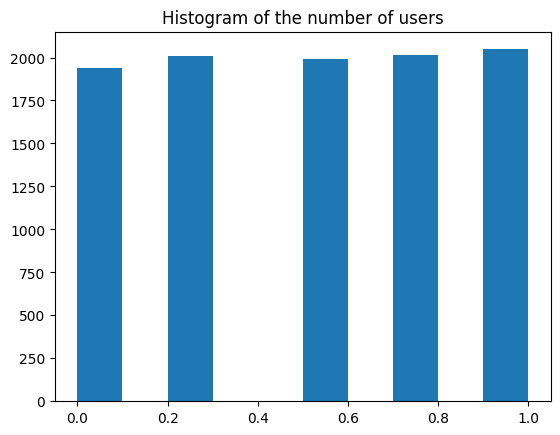

In [74]:
import matplotlib.pyplot as plt
plt.hist(data_F[:,6])
plt.title('Histogram of the number of users')